# Visualizing MNIST Dataset

In [1]:
# No. of rowsx+columns in each image
display_dimension = 10

In [2]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import imageio
from threading import Thread

In [3]:
# Load the dataset
df = pd.read_csv('./../../../datasets/mnist-digits-dataset/train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# remove label from data for easy plotting
d_labels = df['label']
df = df.drop('label', axis=1)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
# group digits
digits = []
for i in range(10):
    d = df[d_labels == i]
    digits.append(d)
    
for i in range(10):
    print(digits[i].shape, len(digits[i]))

(4132, 784) 4132
(4684, 784) 4684
(4177, 784) 4177
(4351, 784) 4351
(4072, 784) 4072
(3795, 784) 3795
(4137, 784) 4137
(4401, 784) 4401
(4063, 784) 4063
(4188, 784) 4188


In [10]:
def genGif(digit, file_name, images_to_plot_in_a_row=10):
    '''
    Function to generate images as subplots on a gif
    digit - list of digits that need to be plotted
    file_name - name of gif file without .gif extension
    images_to_plot_in_a_row - NxN matrix of images in a frame
    '''
    frames = []
    no_of_items = len(digit)
    #no_of_items = 200
    print('No.of Digits: ', no_of_items)
    i = 0
    fig, axes = plt.subplots(images_to_plot_in_a_row,images_to_plot_in_a_row,
                             figsize=(10,10),
                             sharex=True,sharey=True)

    while i < no_of_items:
        #print('Index : ', i)
        fig.suptitle('From {0}'.format(
                    i - i%(images_to_plot_in_a_row*images_to_plot_in_a_row)
                    ));
        for subplot_index in range(images_to_plot_in_a_row*images_to_plot_in_a_row):
            if i >= no_of_items:
                break
            subplot_row = subplot_index//images_to_plot_in_a_row
            subplot_col = subplot_index%images_to_plot_in_a_row
            ax = axes[subplot_row, subplot_col]
            ax.set_adjustable('box')
            ax.set_aspect('equal')
            
            # plot image on subplot
            img = np.reshape(digit.iloc[i,:].values, (28,28))
            ax.imshow(img, cmap='gray_r')
            #ax.set_xbound([0,28])
            i = i + 1

        #plt.tight_layout()
        fig.canvas.draw()
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        frames.append(image)
        #plt.show()

    kwargs_write = {'fps':1.0, 'quantizer':'nq'}
    imageio.mimsave('./{0}.gif'.format(file_name), frames, fps=1)

No.of Digits: No.of Digits:  200
No.of Digits: No.of Digits:    200
200
200No.of Digits:  200

No.of Digits:  No.of Digits: 200
No.of Digits:  200
No.of Digits:  200
 No.of Digits: 200
 200


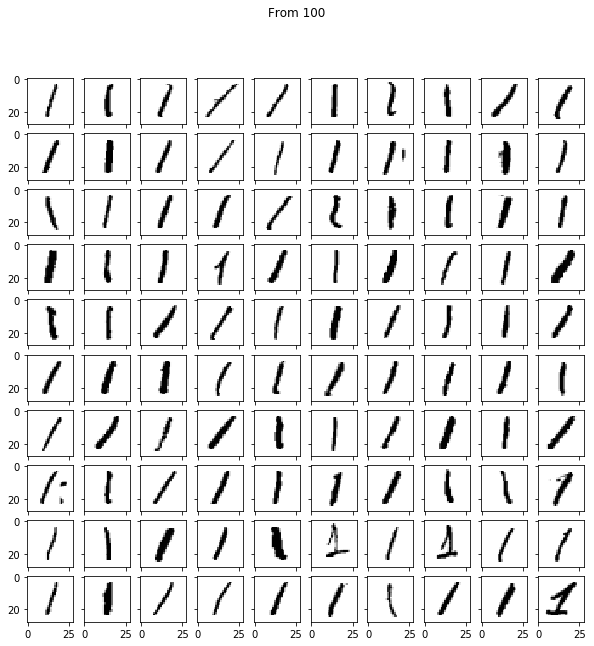

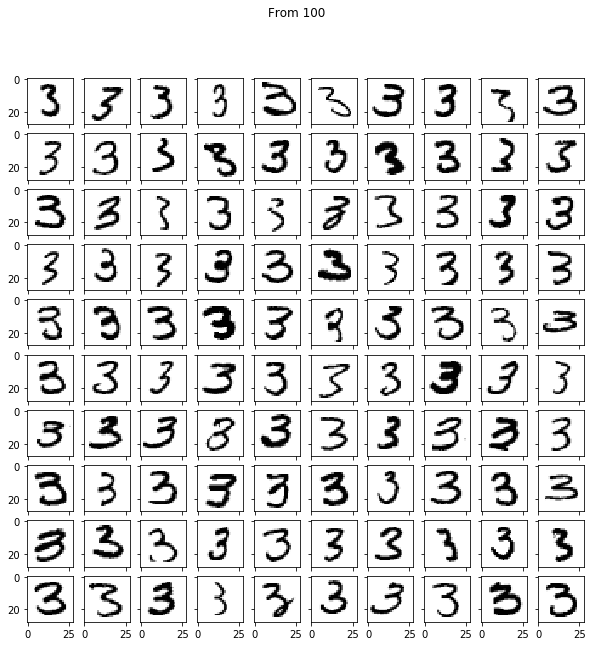

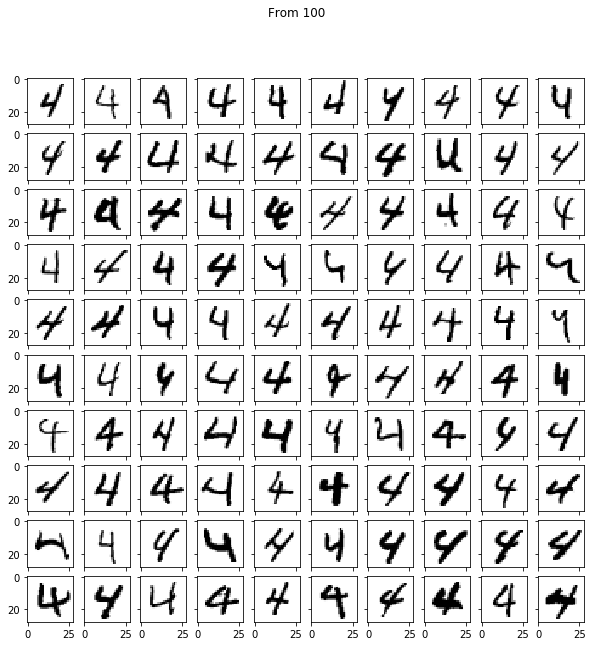

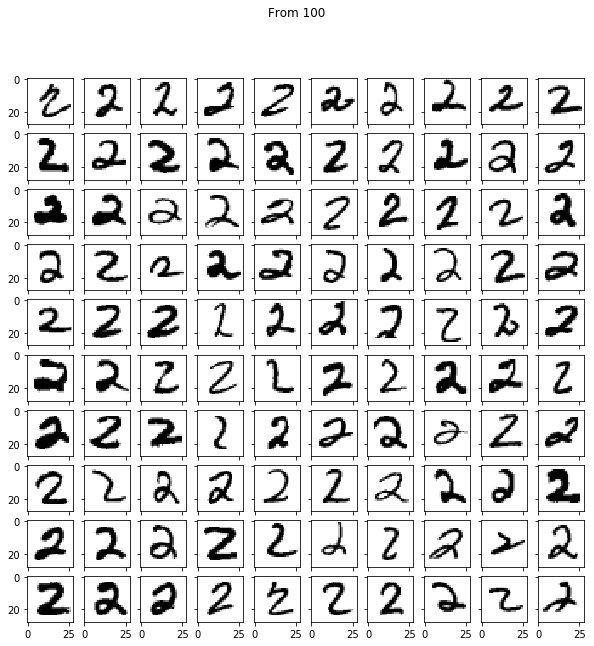

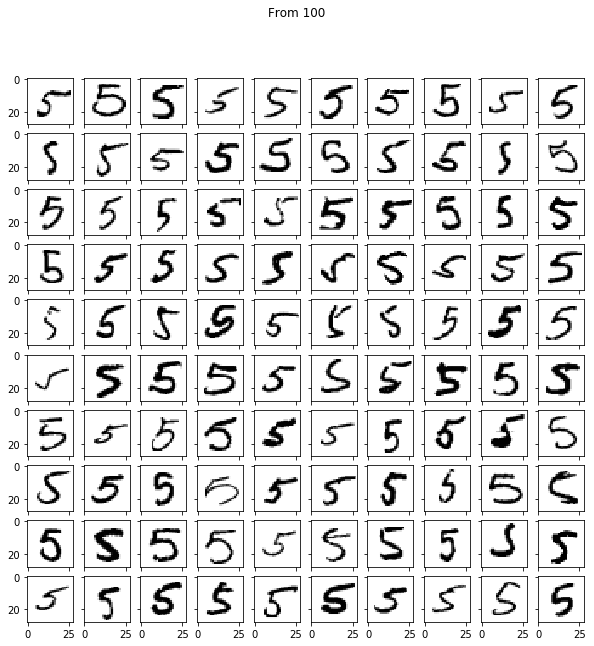

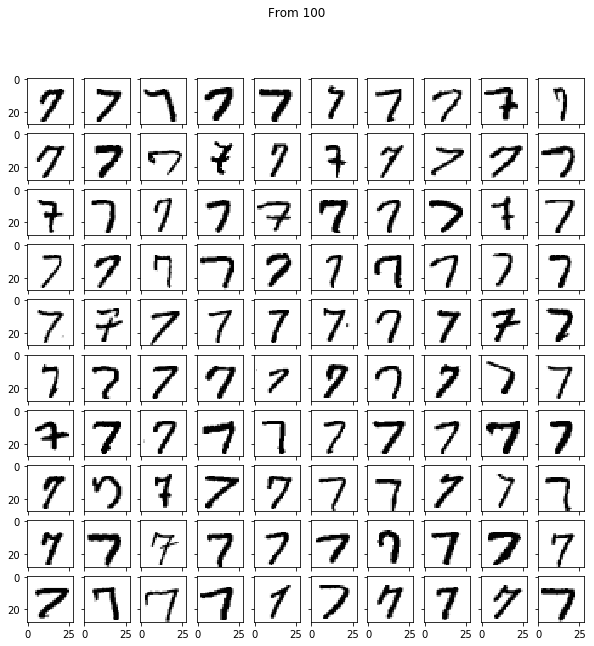

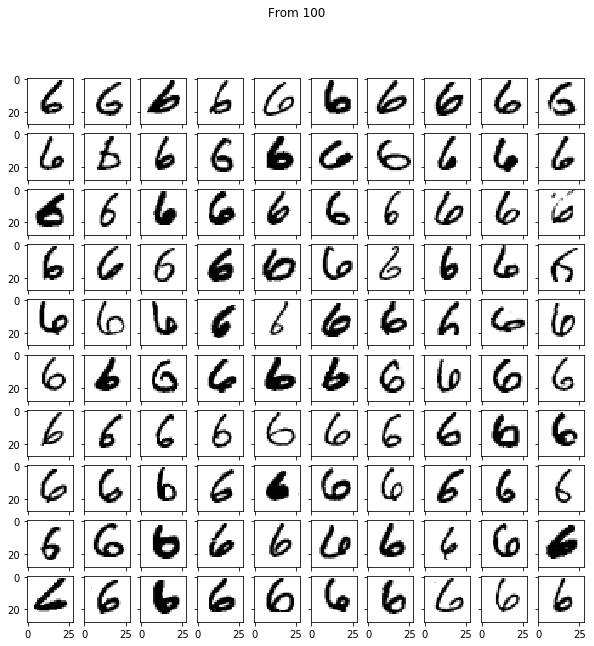

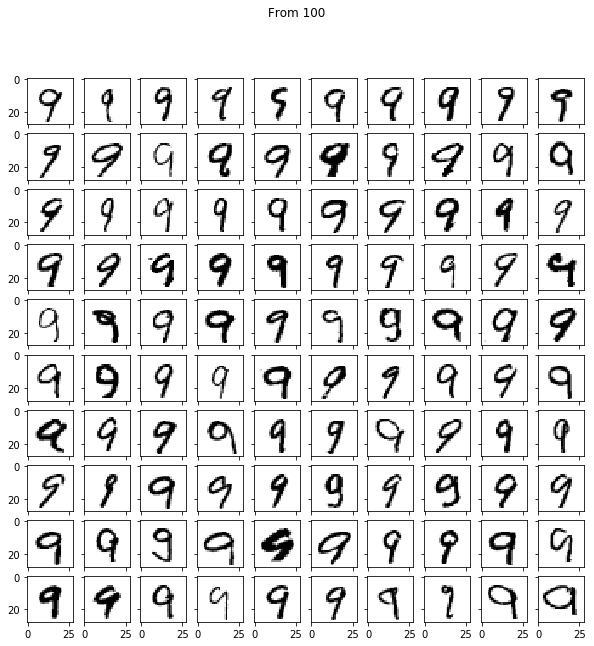

In [11]:
#genGif(digits[0], 'digit-0')

# Create a list of threads
threads = []

# Generate GIF's for each digit
for i in range(10):
    # Starting one process for each digit
    process = Thread(target=genGif,args=[digits[i],'digits-{0}'.format(i)])
    process.start()
    threads.append(process)
    
# Wait for all threads to complete
for process in threads:
    process.join()